In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '..')
from text_cluster.data_clean import get_dataframe_from_file

In [2]:
# Read data
# TODO: replace with path to cleaned data
DATA_PATH = "../cleaned_output.csv"
data = pd.read_csv(DATA_PATH)
data.head()

,id,"Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",Q2: How many ingredients would you expect this food item to contain?,Q3: In what setting would you expect this food to be served? Please check all that apply,Q4: How much would you expect to pay for one serving of this food item?,Q5: What movie do you think of when thinking of this food item?,Q6: What drink would you pair with this food item?,"Q7: When you think about this food item, who does it remind you of?",Q8: How much hot sauce would you add to this food item?,Label
0,716549,3,6.0,"Week day lunch,At a party,Late night snack",5.0,cloudy with a chance of meatballs,coca cola,Friends,A little (mild),Pizza
1,715742,4,2.0,"Week day lunch,At a party,Late night snack",5.0,all sort of american young boy movies,coca cola,"Friends,Teachers,Strangers",NaN,Pizza
2,727333,3,5.0,"Week day lunch,Week day dinner,Weekend lunch,W...",NaN,action movie,coca cola,Friends,A moderate amount (medium),Pizza
3,606874,4,6.5,"Week day lunch,Week day dinner,Weekend lunch,W...",3.0,mamma mia,pop,"Siblings,Friends,Teachers",I will have some of this food item with my hot...,Pizza
4,505318,2,3.0,"Week day lunch,Week day dinner,Weekend lunch,W...",5.0,cloudy with a chance of meatballs,pop,"Siblings,Friends",A little (mild),Pizza


In [3]:
# Expected data:
# Q1: Categorical, complexity to make the food
# Q2: Numerical, number of ingredients
# Q3: Categorical, setting where the food is served
# Q4: Numerical, cost of the food
# Q5: Categorical, what movie goes with the food
# Q6: Categorical, what drink goes with the food
# Q7: Categorical, what people goes with the food
# Q8: Categorical, how much hot sauce

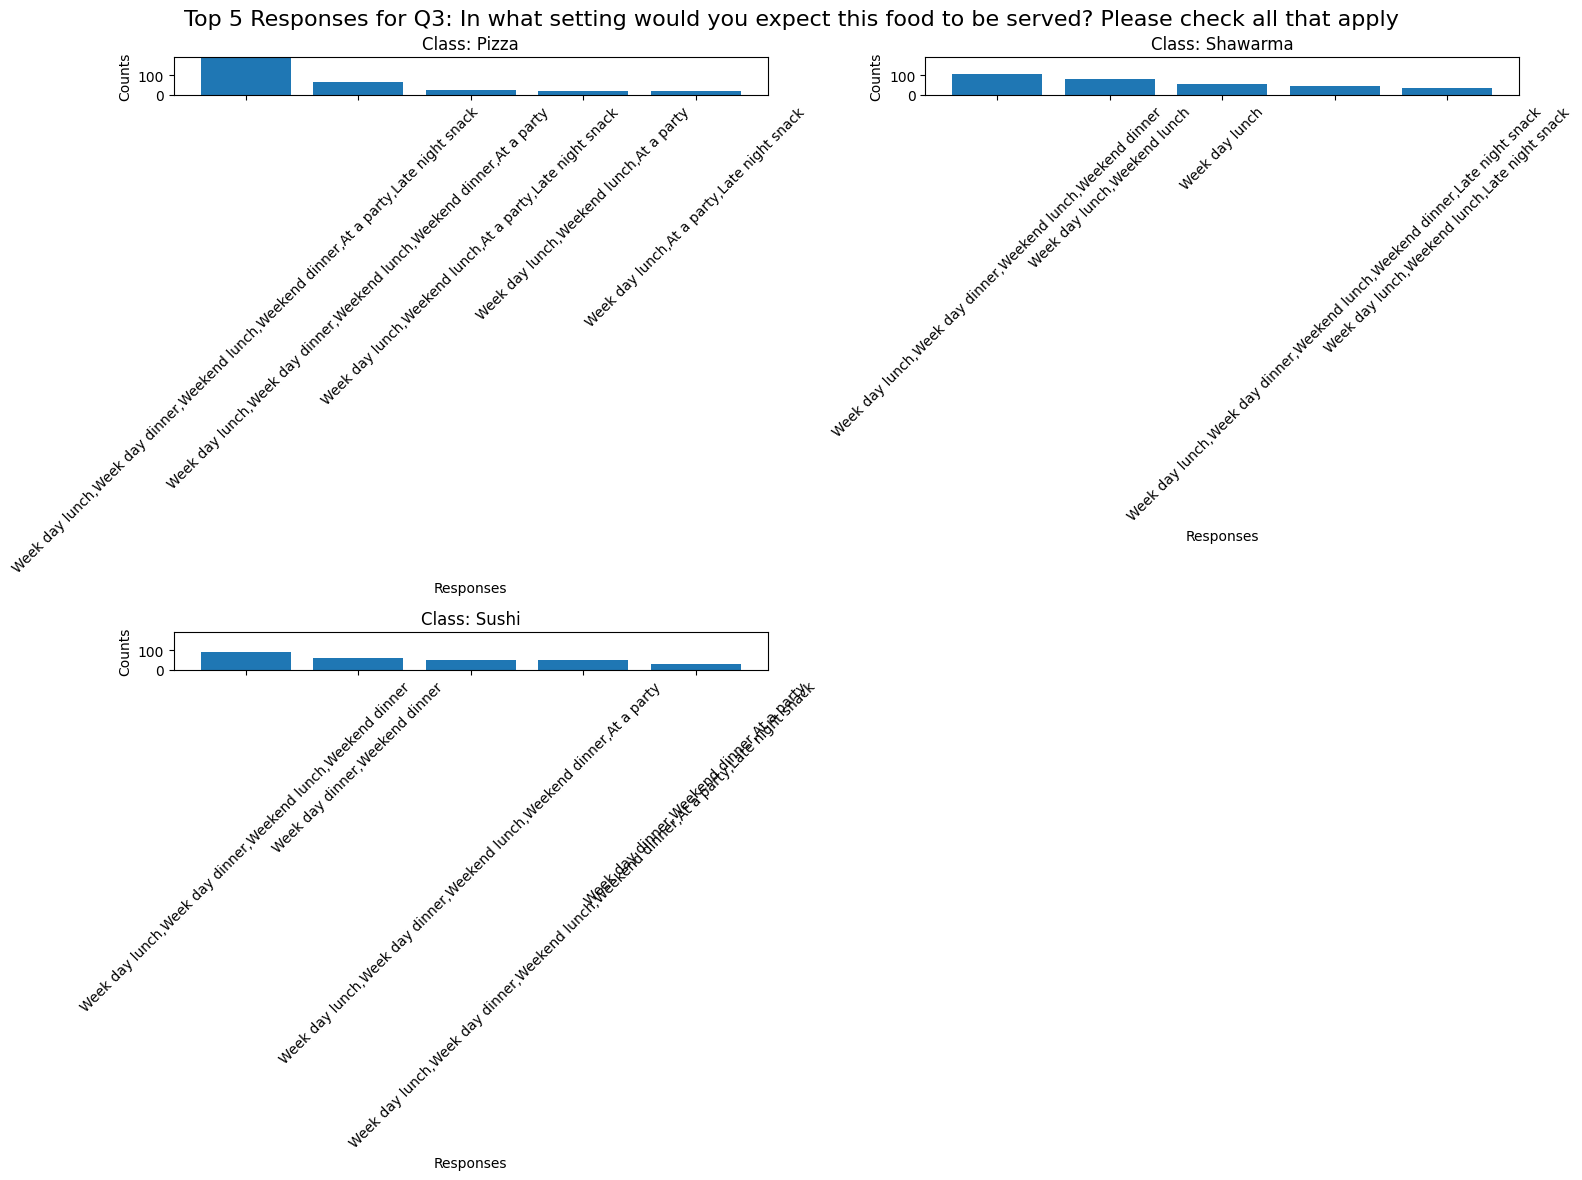

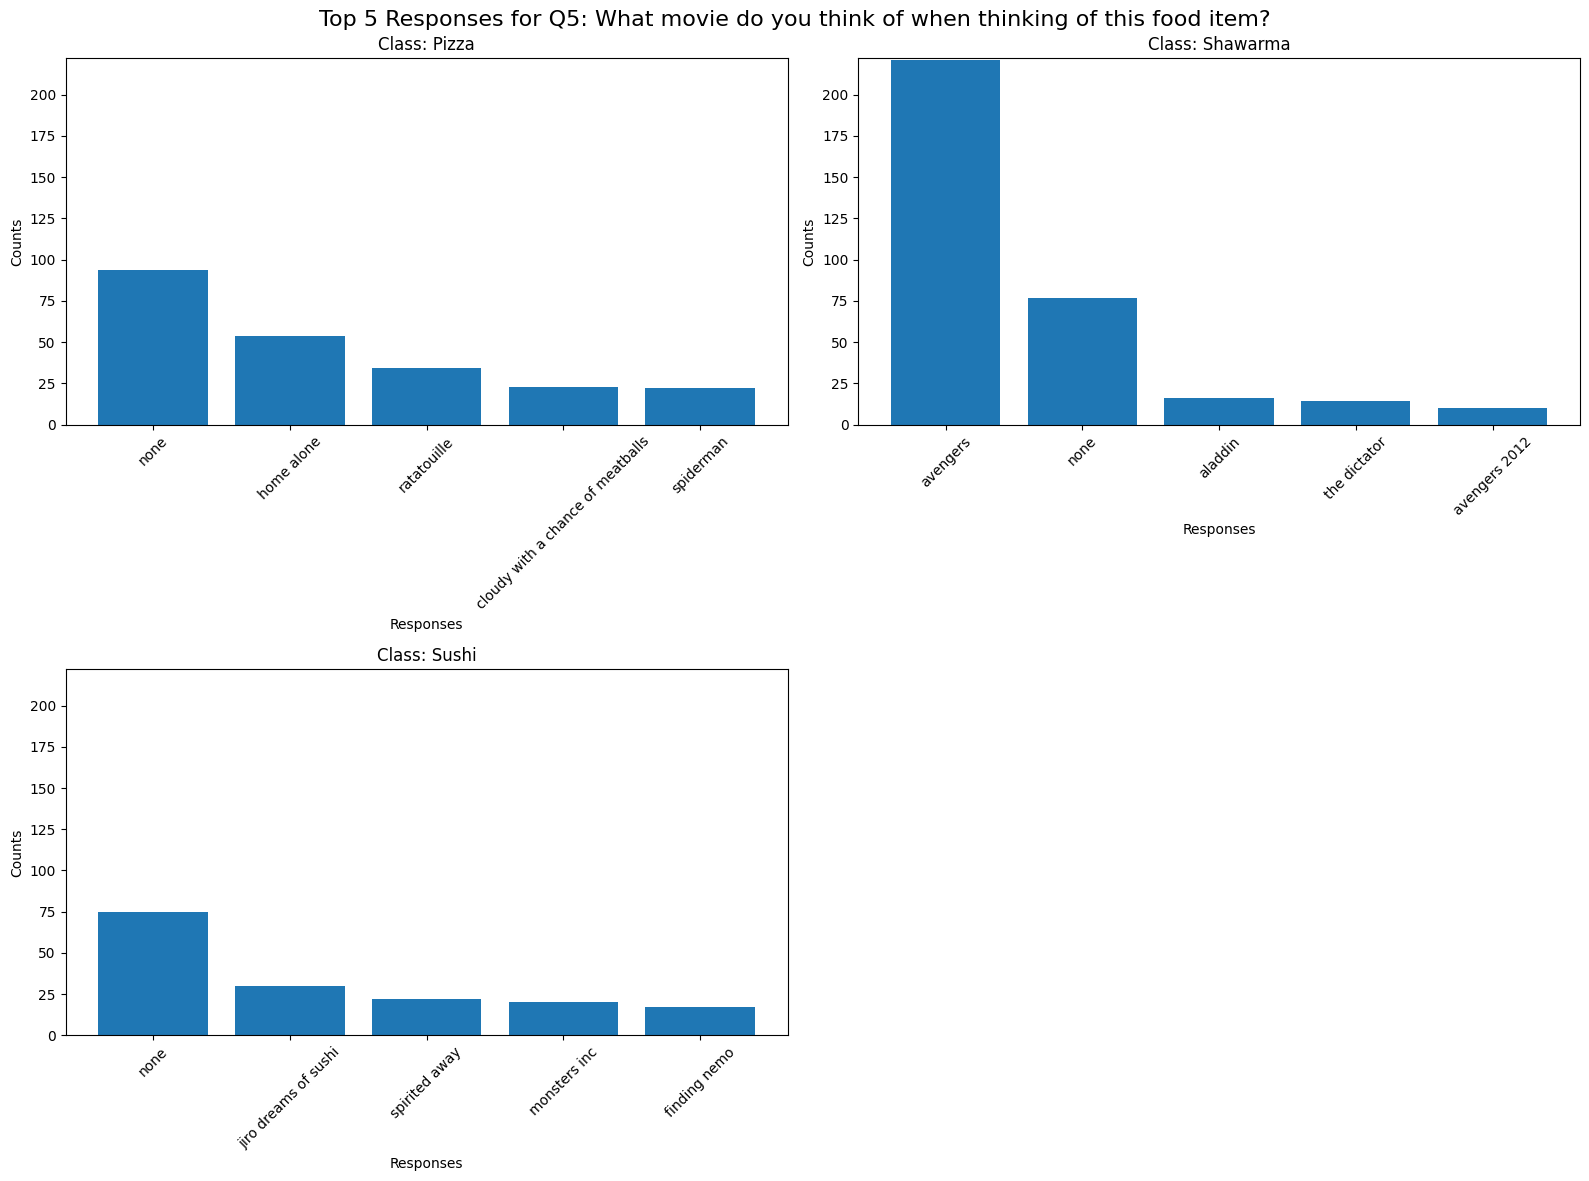

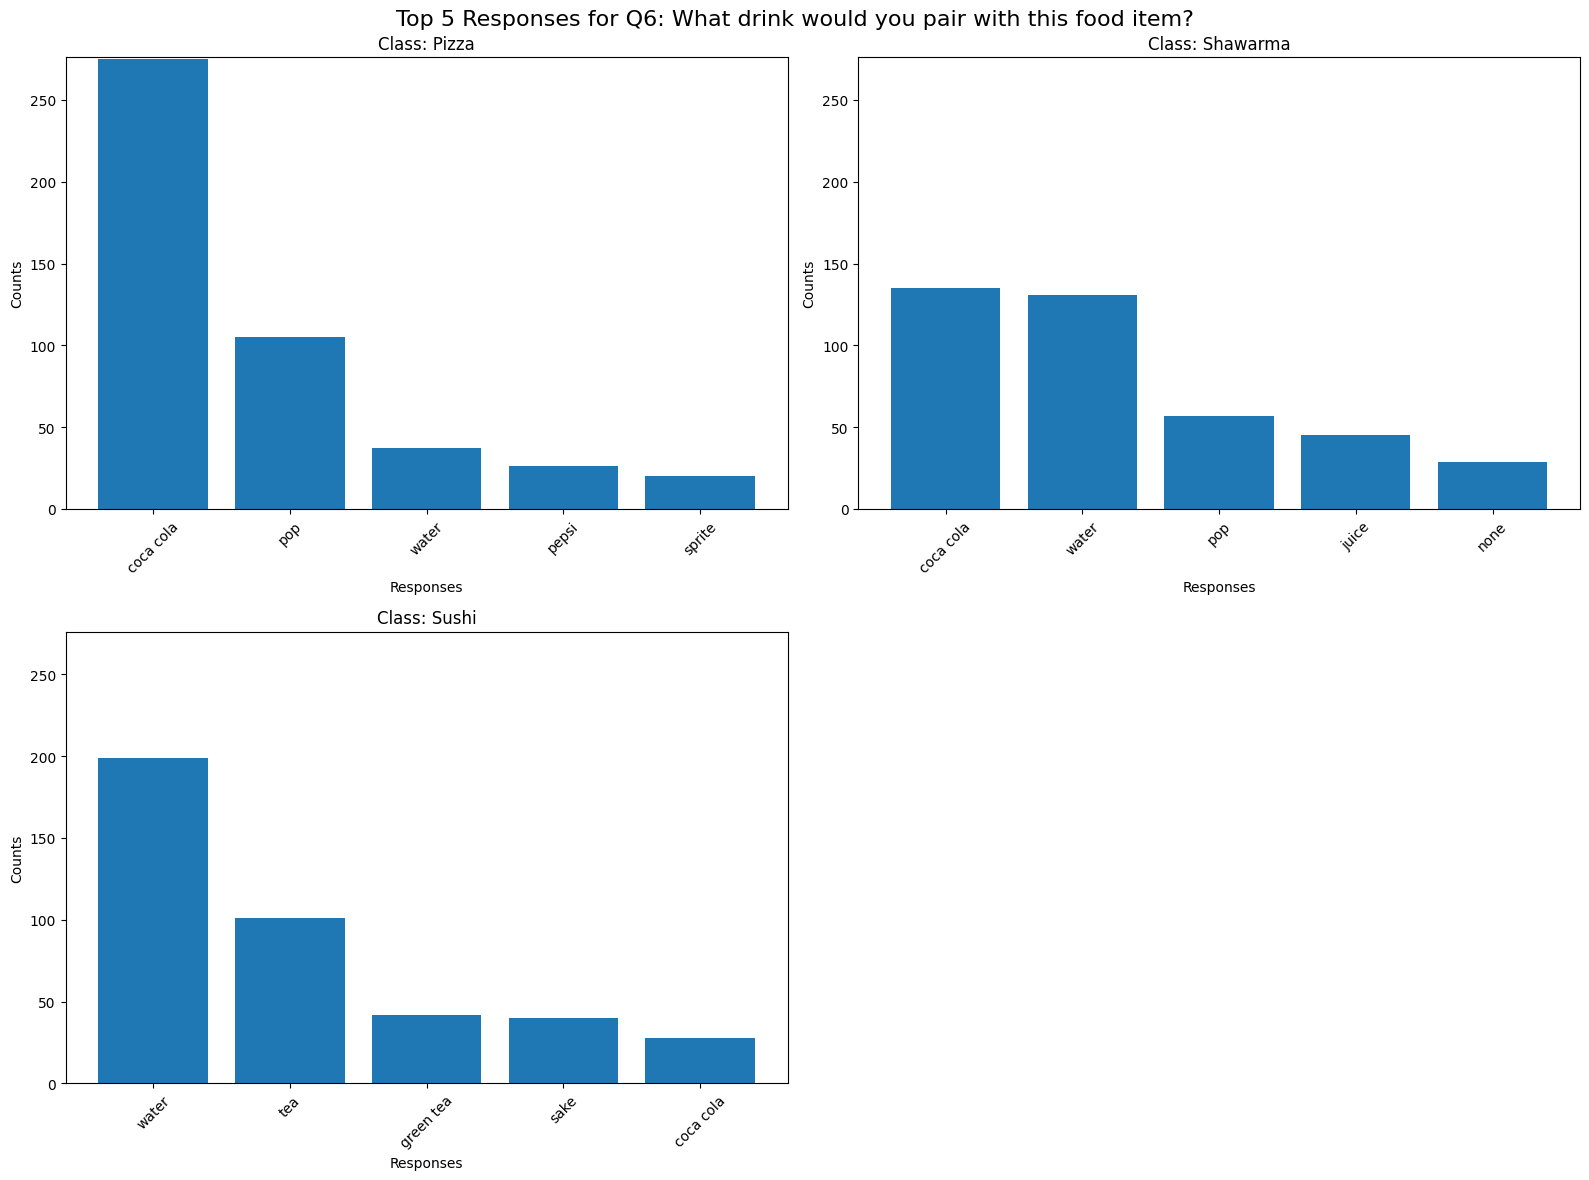

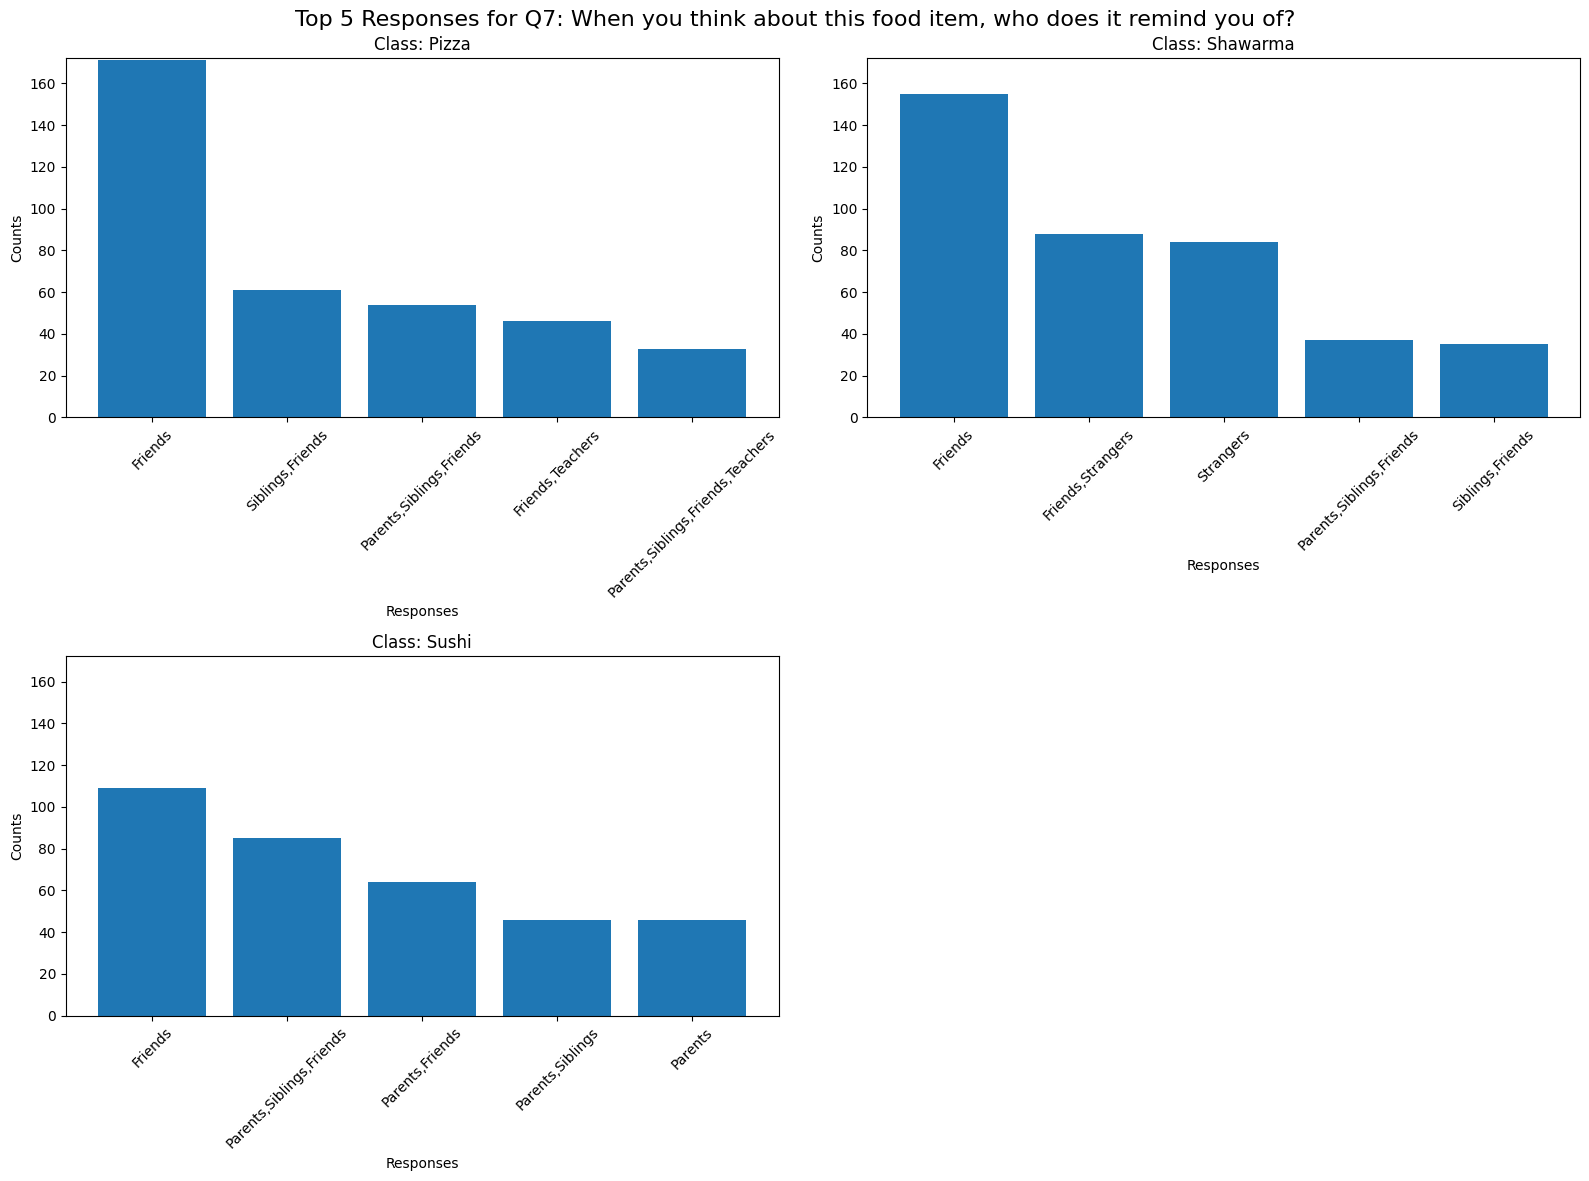

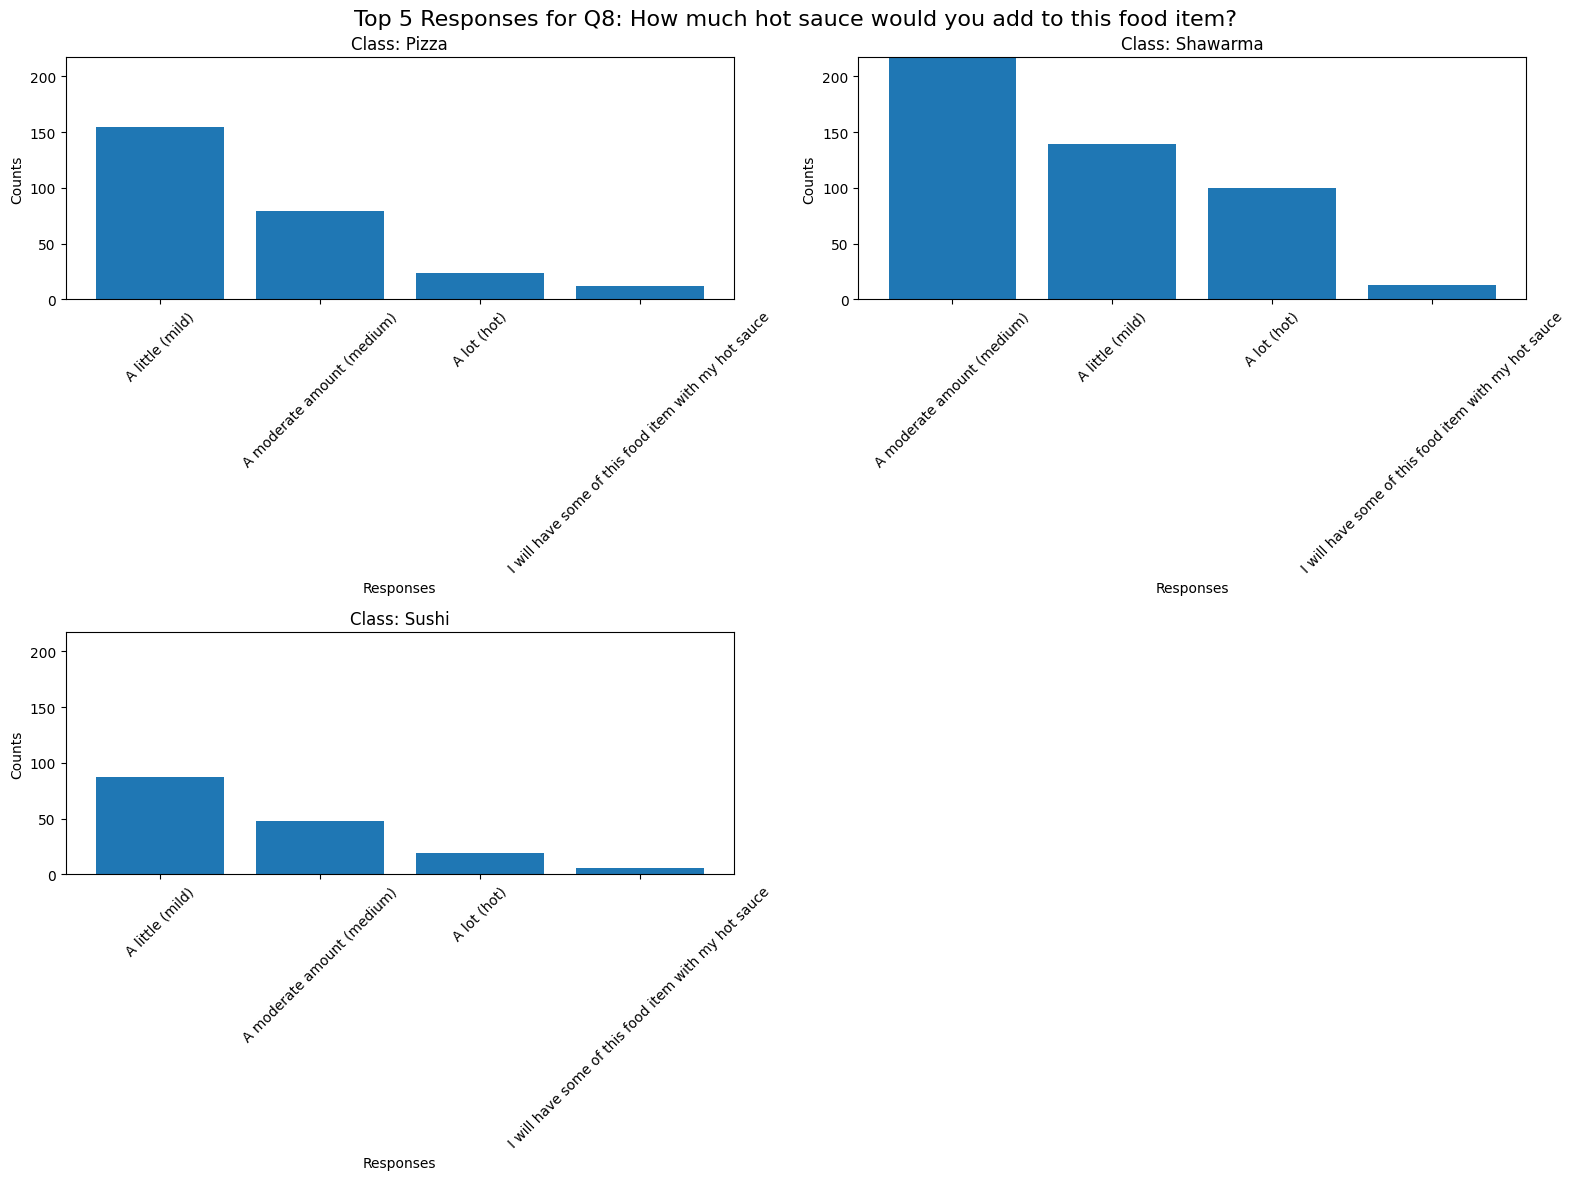

In [4]:
import math

# Assuming 'data' is your DataFrame and 'categorical_columns' is defined

categorical_columns = [3, 5, 6, 7, 8]  # Replace with your actual column indices
labels = data["Label"].unique()  # Get unique food labels

for col_idx in categorical_columns:
    column = data.columns[col_idx]

    # Calculate the number of rows and columns for the grid
    num_labels = len(labels)
    cols = 2
    rows = math.ceil(num_labels / cols)

    # Create a figure with subplots in a grid layout
    fig, axes = plt.subplots(rows, cols, figsize=(8 * cols, 6 * rows))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    fig.suptitle(f"Top 5 Responses for {column}", fontsize=16)
    # Find the maximum count across all subplots
    max_count = 0
    for class_value in labels:
        class_data = data[data['Label'] == class_value][column]
        string_counts = class_data.value_counts().nlargest(5)
        max_count = max(max_count, string_counts.max())

    for i, class_value in enumerate(labels):
        class_data = data[data['Label'] == class_value][column]
        string_counts = class_data.value_counts().nlargest(5)
        axes[i].set_title(f"Class: {class_value}")

        axes[i].bar(string_counts.index, string_counts.values)
        axes[i].set_xlabel("Responses")
        axes[i].set_ylabel("Counts")
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_ylim(0, max_count + 1)  # Set the same y-axis limit for all subplots

    # Remove any unused subplots if the grid has extra slots
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig(f"top_5_responses_{column}_grid_same_scale.png")
    plt.show()

<Figure size 1000x600 with 0 Axes>

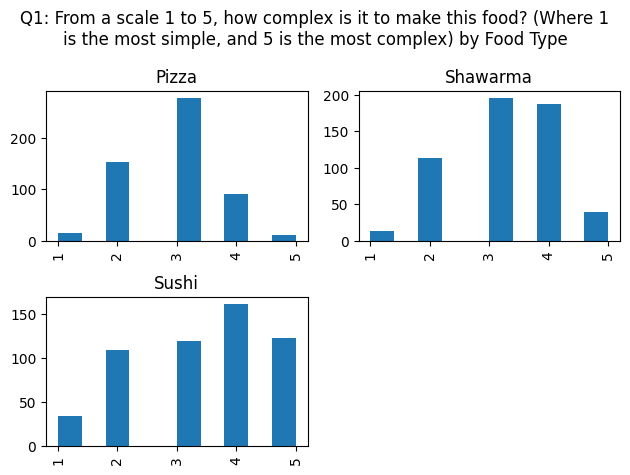

<Figure size 1000x600 with 0 Axes>

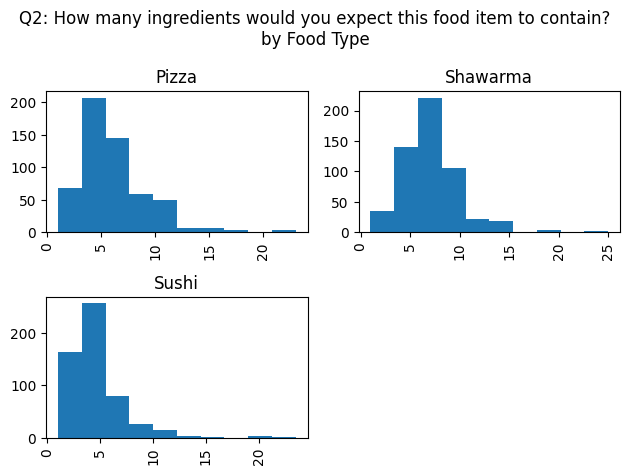

<Figure size 1000x600 with 0 Axes>

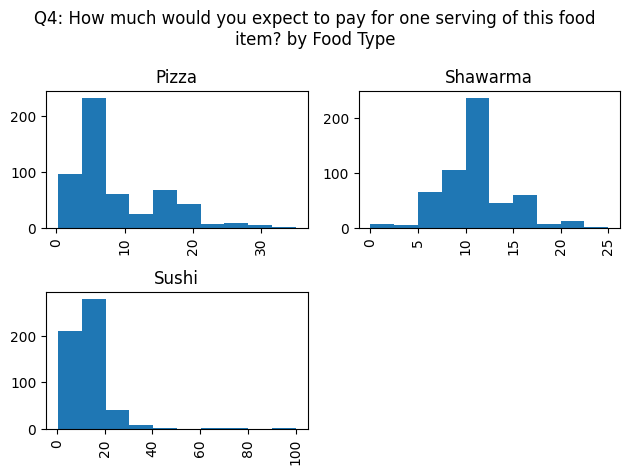

In [11]:

# Do a box plot for each numerical column
numerical_columns = [1, 2, 4]
import textwrap

for i in numerical_columns:
    column_name = data.columns[i]
    # Histogram with Consistent Y-Axis
    fig = plt.figure(figsize=(10, 6))    
    # Calculate the global max frequency for consistent y-axis in histograms
    max_freq = 0
    for label in data["Label"].unique():
        label_data = data[data["Label"] == label][column_name]
        if not label_data.empty:
            max_freq = max(max_freq, label_data.value_counts().max())
    
    # plt.title(f"Histogram of {column_name} by Food Type")
    data.hist(column=column_name, by='Label', bins=10)
    title = wrapped_title = textwrap.fill(f"{column_name} by Food Type")  # Adjust width as needed
    plt.suptitle(title)
    plt.ylabel(column_name.split(':')[0])
    plt.ylim(0, max_freq + 1)  # Set consistent y-axis limits (add 1 for buffer)
    plt.tight_layout()
    plt.savefig(f"histogram_{column_name}.png")
    plt.show()